# OTOKODLAYICILAR

![](https://cdn.evrimagaci.org/bm2R8z2LCChlqzJNXp5EwbTaZiw=/825x0/filters:no_upscale()/evrimagaci.org%2Fpublic%2Fcontent_media%2F8ee347b9bc1ee90bf1db8f9c00217b5f.png)

![](https://miro.medium.com/max/605/1*stpRRU3tUaOtTjRqh24v0w.png)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Kütüphane Kurulumları

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


Veri Kümesini Oluşturmak ve Ayırmak

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape (x_train, (len(x_train), 28, 28, 1))
x_test =  np.reshape (x_test, (len(x_test), 28, 28, 1))

In [ ]:
print('Eğtiim',x_train.shape)
print('Test', x_test.shape)

Eğtiim (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


Veriye Gürültü Ekleme Adımı

In [ ]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0. ,1.)
x_test_noisy = np.clip(x_test_noisy, 0. ,1.)

Gürültülü Veriyi Görselleştirme

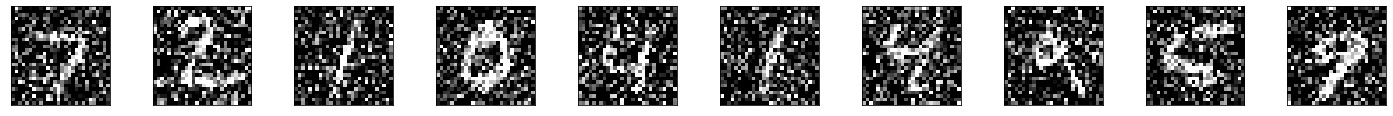

gürültülü orijinal görüntüler


In [ ]:
%matplotlib inline

n = 10

plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print('gürültülü orijinal görüntüler')

ENCODE Modeli

In [ ]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)

# (7, 7, 32)

DECODE Modeli

In [ ]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

Modelin Derlenmesi ve Eğitilmesi

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1285 - val_loss: 0.1192
Epoch 2/10
60000/60000 [==============================] - 150s 2ms/step - loss: 0.1152 - val_loss: 0.1106
Epoch 3/10
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1097 - val_loss: 0.1074
Epoch 4/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1068 - val_loss: 0.1048
Epoch 5/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1049 - val_loss: 0.1035
Epoch 6/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1035 - val_loss: 0.1008
Epoch 7/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1022 - val_loss: 0.1002
Epoch 8/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1016 - val_loss: 0.0996
Epoch 9/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1011 - val_loss: 0.0

Sonuçların Görselleştirilmesi